In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
from scripts.fp_prep_and_hp import df_load
df = df_load()

In [4]:
df['risk_level'] = df['risk_level'].replace({'mid':'high'})
df.drop(['diastolic_bp', 'heart_rate'], axis = 1, inplace = True)

In [5]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 76)

In [8]:
model = DecisionTreeClassifier(random_state = 76, criterion = 'gini')

In [9]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20]
}

In [10]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=76), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20]}, verbose=2)

In [11]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [12]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=76)

In [13]:
y_pred = best_model.predict(X_test)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.91      0.75      0.82        53
         low       0.81      0.93      0.87        60

    accuracy                           0.85       113
   macro avg       0.86      0.84      0.85       113
weighted avg       0.86      0.85      0.85       113



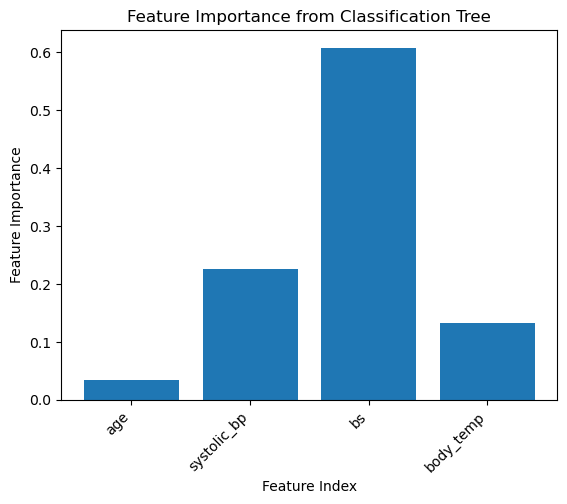

In [15]:
importances = best_model.feature_importances_
feature_names = X.columns.tolist()
plt.bar(range(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.xticks(range(len(importances)), feature_names, rotation=45, ha='right')
plt.title('Feature Importance from Classification Tree')
plt.show()